# Linear Regression

## 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Generate synthetic data

In [2]:
# data created from: y = 3x + 2 + n (noise)
np.random.seed(0)

N = 1000      # n data samples
wtrue = 3.0  # x coeff
btrue = 2.0  # true bias
nstd = 1.0   # std noise

X = np.random.uniform(-3, 3, size=(N, 1))
eps = np.random.normal(0, nstd, size=(N, 1))
Y = wtrue*X + btrue        # Y with no noise
Yn = wtrue*X + btrue + eps # Y with noise

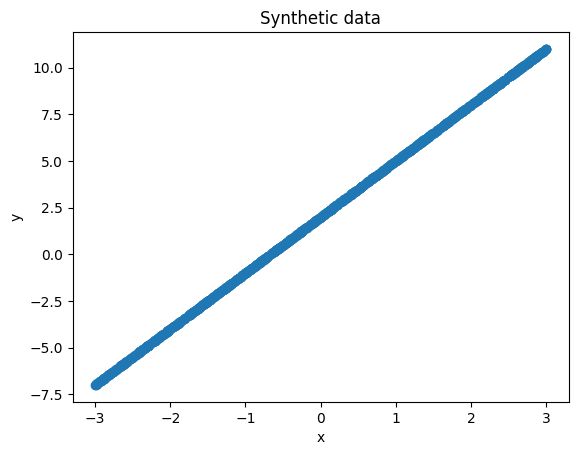

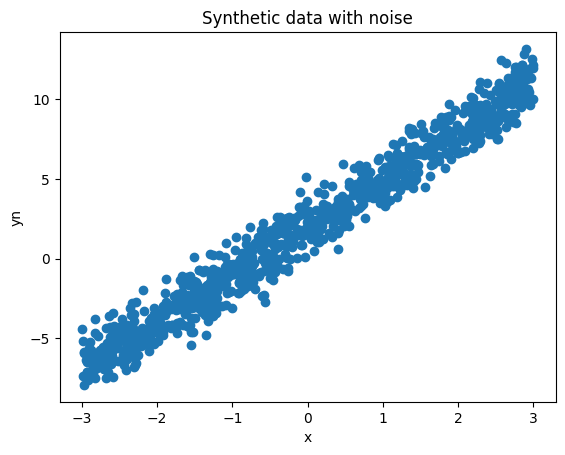

In [3]:
plt.scatter(X, Y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic data")
plt.show()

plt.scatter(X, Yn)
plt.xlabel("x")
plt.ylabel("yn")
plt.title("Synthetic data with noise")
plt.show()

## 3. Model definition

In [4]:
# yhat = w*x + b
# for data without noise
w = np.random.randn()
b = np.random.randn()

# for data with noise
wn = np.random.randn()
bn = np.random.randn()

## 4. Loss function (MSE)

In [5]:
def mse(y, yhat):
    return np.mean((y-yhat)**2)

## 5. Gradients

In [6]:
# dL/dw = dL/dyhat * dyhat/dw
# dL/dyhat = d((y-yhat)^2) * d(y-yhat) = 2(y-yhat) * (-1)
# dyhat/dw = d(wx+b) = x
# dL/dw = 2(y-yhat) * -1 * x = -2/N Sum x(y-yhat)

# dL/db = dL/dyhat * dyhat/db
# dyhat/db = d(wx+b) = 1
# dL/db = -2/N Sum (y-yhat)

def grads(y, yhat, x):
    er = y - yhat # error
    dw = -2 * np.mean(x * er)
    db = -2 * np.mean(er)
    return dw, db

## 6. Training Loop

#### Training without noise:
y = 3x + 2 and $\hat{y}$ = wx + b \
*The perfect solution:* w = 3, b = 2 \
So, the gradient descent converges to it, and: MSE = 0

In [7]:
# Tr loop: Data without noise

lr = 0.1   # learning rate
epochs = 201
losses = []

for e in range(epochs):
    yhat = w*X + b
    loss = mse(Y, yhat)
    losses.append(loss)

    dw, db = grads(Y, yhat, X)
    # grad descent
    w -= lr * dw
    b -= lr * db

    if e%20 == 0:
        print(f"epoch: {e+1} | loss: {loss:.4f} | w {w} | b {b}")

epoch: 1 | loss: 13.9773 | w 2.2099423202336856 | b 0.8679882002252177
epoch: 21 | loss: 0.0003 | w 2.999841997861948 | b 1.9868221576868386
epoch: 41 | loss: 0.0000 | w 2.999998175750344 | b 1.9998478467889735
epoch: 61 | loss: 0.0000 | w 2.9999999789369585 | b 1.999998243217747
epoch: 81 | loss: 0.0000 | w 2.999999999756803 | b 1.9999999797159465
epoch: 101 | loss: 0.0000 | w 2.999999999997192 | b 1.9999999997657978
epoch: 121 | loss: 0.0000 | w 2.9999999999999676 | b 1.999999999997296
epoch: 141 | loss: 0.0000 | w 2.9999999999999996 | b 1.999999999999969
epoch: 161 | loss: 0.0000 | w 3.0 | b 1.9999999999999996
epoch: 181 | loss: 0.0000 | w 3.0 | b 1.9999999999999996
epoch: 201 | loss: 0.0000 | w 3.0 | b 1.9999999999999996


#### Training with noise:
y = 3x + 2 + $ε$ and $\hat{y}$ = wx + b
- *The perfect solution:* **does not exist**
- there's no exact line that fits all points
- problem gradient descent's trying to solve: $\min_{w, b} \; \mathbb{E}\Big[(wx + b - (3x + 2 + \varepsilon))^2\Big]$
- the optimal solution becomes: $w^* = \frac{\mathrm{Var}(x)}{\mathrm{Cov}(x, \varepsilon)}$
- because: y = 3x + 2 + $ε$
- it becomes: $w^* = 3 + \frac{\mathrm{Var}(x)}{\mathrm{Cov}(x, \varepsilon)}$
- Since, the noise is random: $Cov(x, ε)\neq 0$ for finite samples

- So, *we do not get exactly 3, rather close to 3*.

In [8]:
# Tr loop: Data with noise

lrn = 0.1   # learning rate: noisy data
epochsn = 201
lossesn = []

for e in range(epochsn):
    yhat = wn*X + bn
    loss = mse(Yn, yhat)
    losses.append(loss)

    dw, db = grads(Yn, yhat, X)
    # grad descent
    wn -= lr * dw
    bn -= lr * db

    if e%20 == 0:
        print(f"epoch: {e+1} | loss: {loss:.4f} | wn {wn} | bn {bn}")

epoch: 1 | loss: 44.8293 | wn 1.4940093740032516 | bn 1.8281074644429092
epoch: 21 | loss: 0.9327 | wn 2.9837968155601375 | bn 2.0261270666728737
epoch: 41 | loss: 0.9327 | wn 2.9838267072154747 | bn 2.028619306208549
epoch: 61 | loss: 0.9327 | wn 2.9838270522239534 | bn 2.028648081956259
epoch: 81 | loss: 0.9327 | wn 2.9838270562074696 | bn 2.0286484142050663
epoch: 101 | loss: 0.9327 | wn 2.983827056253464 | bn 2.0286484180412576
epoch: 121 | loss: 0.9327 | wn 2.983827056253995 | bn 2.0286484180855506
epoch: 141 | loss: 0.9327 | wn 2.983827056254001 | bn 2.0286484180860618
epoch: 161 | loss: 0.9327 | wn 2.983827056254001 | bn 2.028648418086067
epoch: 181 | loss: 0.9327 | wn 2.983827056254001 | bn 2.028648418086067
epoch: 201 | loss: 0.9327 | wn 2.983827056254001 | bn 2.028648418086067
